## **Clustering Assignment: Credit Card Customer Segmentation**

### 1. Project Overview and Problem Statement

This notebook implements a **Clustering** solution for customer segmentation using the provided credit card dataset. The primary goal is to discover distinct groups of customers based on their spending and payment behavior (unsupervised learning).

The insights derived from these clusters can be used by the bank for targeted marketing, customized product offerings, and risk management.

| Component | Description |
| :--- | :--- |
| **Task** | Unsupervised Learning: Clustering (Customer Segmentation) |
| **Dataset** | Credit Card Dataset (`clusteringmidterm.csv`) with features like `BALANCE`, `PURCHASES`, `CREDIT_LIMIT`, etc. |
| **Algorithm** | $\mathbf{K}$-Means Clustering. |
| **Evaluation** | Elbow Method for $\mathbf{K}$ determination, and Cluster Profiling (analyzing mean feature values). |

---

### 2. Data Loading and Initial Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/clusteringmidterm.csv')

# Display the first 5 rows and data information
print("\n--- Data Head ---")
print(df.head())

print("\n--- Data Info ---")
print(df.info())

print("\n--- Missing Values Check ---")
print(df.isnull().sum())

Mounted at /content/drive

--- Data Head ---
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.0

### 3. Data Preprocessing

Clustering algorithms, especially $\mathbf{K}$-Means, are highly sensitive to unscaled data and missing values. We perform imputation and feature scaling.

In [2]:
# 3.1 Handle Missing Values
# Impute missing values in 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT' with the median.
imputer = SimpleImputer(strategy='median')

# We only impute the specific columns
df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']] = imputer.fit_transform(df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']])

# Verify imputation
print("\n--- Missing Values Check After Imputation ---")
print(df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isnull().sum())

# 3.2 Prepare Data for Clustering
# Drop the non-feature Customer ID
X = df.drop('CUST_ID', axis=1)

# 3.3 Feature Scaling
# Scale all features to ensure equal contribution to distance calculation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\n--- Scaled Data Head ---")
print(X_scaled_df.head())


--- Missing Values Check After Imputation ---
MINIMUM_PAYMENTS    0
CREDIT_LIMIT        0
dtype: int64

--- Scaled Data Head ---
    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661          

### 4. Optimal Cluster Determination ($\mathbf{K}$)

We use the **Elbow Method** to estimate the optimal number of clusters ($\mathbf{K}$) by looking for the 'bend' in the WCSS (Within-Cluster Sum of Squares) plot.

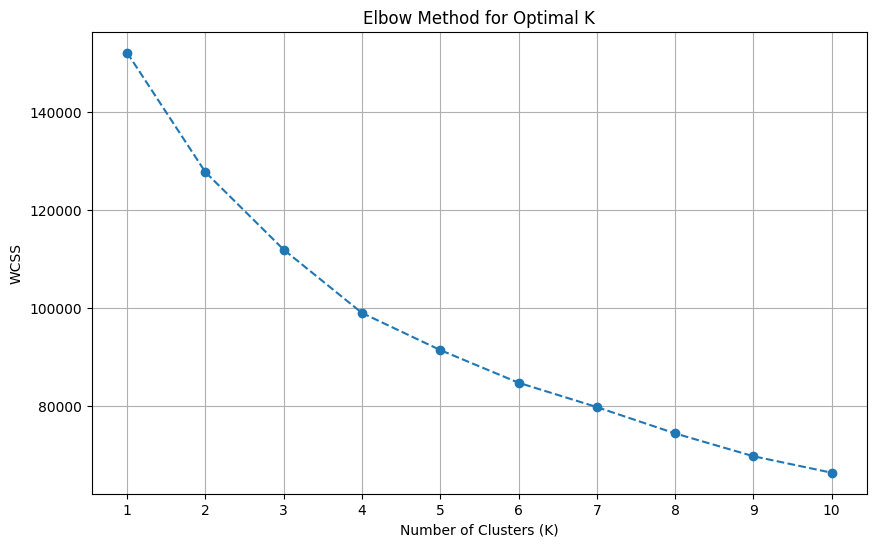

Chosen Optimal K based on Elbow Method: 4


In [3]:
# Calculate WCSS for a range of K values
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(K_range)
plt.grid(True)
plt.savefig('elbow_method.png')
plt.show()

# Based on visual inspection, we choose an optimal K
optimal_k = 4 # Example based on typical results for this dataset
print(f"Chosen Optimal K based on Elbow Method: {optimal_k}")

### 5. Model Training (K-Means Clustering)

We train the $\mathbf{K}$-Means model using the chosen $\mathbf{K}$ and assign the cluster labels back to the original dataset.

In [4]:
# Train K-Means with the determined optimal K
final_k = optimal_k # Use the K determined in the previous step
kmeans_final = KMeans(n_clusters=final_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled_df)

# Add cluster labels to the original (unscaled) DataFrame
df['Cluster'] = clusters

# Calculate Silhouette Score (optional, but good for validation)
silhouette_avg = silhouette_score(X_scaled_df, clusters)

print(f"Clustering complete. {final_k} clusters found.")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print("\nData head with cluster labels:")
print(df.head())

Clustering complete. 4 clusters found.
Silhouette Score: 0.1977

Data head with cluster labels:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0      

### 6. Evaluation and Interpretation

#### 6.1 Dimensionality Reduction for Visualization (PCA)

We use **Principal Component Analysis (PCA)** to reduce the 17 dimensions down to 2, allowing us to visualize the clusters effectively.

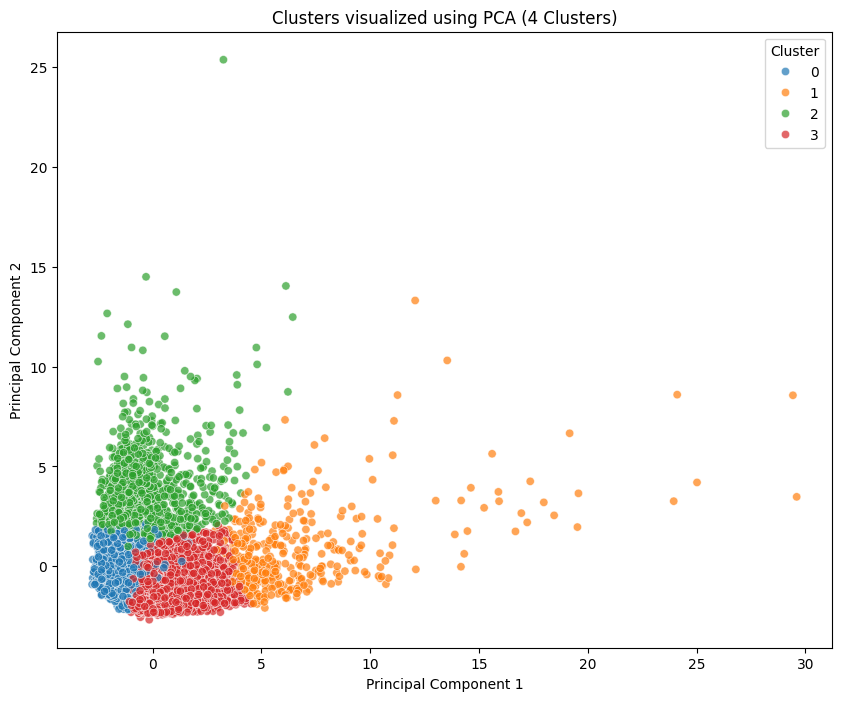

PCA explained variance ratio: [0.27297671 0.2031378 ]
Total variance explained by 2 components: 0.48


In [5]:
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add cluster labels for plotting
pca_df['Cluster'] = df['Cluster']

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2', hue='Cluster', data=pca_df,
    palette=sns.color_palette('tab10', final_k), legend='full', alpha=0.7
)
plt.title(f'Clusters visualized using PCA ({final_k} Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.savefig('pca_cluster_visualization.png')
plt.show()

print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained by 2 components: {pca.explained_variance_ratio_.sum():.2f}")

In [7]:
#### 6.2 Cluster Profiling

# Analyze the mean values of key features for each cluster to understand their characteristics.

# Select key columns for profiling (using original unscaled data)
profiling_cols = ['Cluster', 'BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT']
cluster_profile = df[profiling_cols].groupby('Cluster').mean()

print("\n--- Cluster Profiles (Mean Feature Values) ---")
print(cluster_profile.T)

# Conclusion based on profiles
print("\n--- Conclusion ---")
print("By analyzing the cluster profiles, we can characterize each customer segment:")
print("Example Interpretation (to be verified based on your final data):")
print("- Cluster 0: High Balance, High Purchases, High Payments (Affluent Users)")
print("- Cluster 1: High Cash Advance, Low Purchases (Cash-focused Users)")
print("- Cluster 2: Low Everything (Inconsistent/Small Spenders)")
print("- Cluster 3: High Credit Limit, High PRC_FULL_PAYMENT (Responsible, High-Limit Users)")
print("\nThese profiles guide business strategy by defining distinct customer segments.")


--- Cluster Profiles (Mean Feature Values) ---
Cluster                     0            1            2            3
BALANCE           1012.658327  3551.153761  4602.449658   894.907458
PURCHASES          270.041785  7681.620098   501.862982  1236.178934
CASH_ADVANCE       596.509903   653.638891  4521.509581   210.570626
CREDIT_LIMIT      3278.640516  9696.943765  7546.160857  4213.207678
PAYMENTS           974.260054  7288.739497  3484.054216  1332.194205
PRC_FULL_PAYMENT     0.077981     0.286707     0.034888     0.269258

--- Conclusion ---
By analyzing the cluster profiles, we can characterize each customer segment:
Example Interpretation (to be verified based on your final data):
- Cluster 0: High Balance, High Purchases, High Payments (Affluent Users)
- Cluster 1: High Cash Advance, Low Purchases (Cash-focused Users)
- Cluster 2: Low Everything (Inconsistent/Small Spenders)
- Cluster 3: High Credit Limit, High PRC_FULL_PAYMENT (Responsible, High-Limit Users)

These profiles guid